## Visualizing the Probability that Population Mean Exceeds a Value
This notebook is my answer to Assignment 3 in the Applied Data Visualization course of the Applied Data Science certificate program on Coursera, offered by the University of Michigan. 

Researchers frequently fail to consider probability in early stages of data analysis. This assignment develops two tools described in the following paper:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))

Both tools act upon a bar plot rendered in matplotlib, with each bar derived from a row in the passed dataframe. 

Using the first tool, the user can select a point on the graph, whose y-value will be used to make the following determination: What is the probability that the *population* mean of each group is *greater* than the given y-value. The probability for each bar will be indicated by a color, ranging from blue (low probability) to red (high probability).

The second tool enables the user to select a span of y-values. The bars are colored based on the probability that the population mean falls within the range of y-values selected.

In [121]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

In [122]:
import matplotlib.pyplot as plt
%matplotlib notebook
import scipy.stats as st
import matplotlib.colors as colors
import matplotlib.cm as cm
from matplotlib.widgets import SpanSelector

In [123]:
def probability(row, value):
    se_mean = st.sem(row)
    x_bar = np.mean(row)
    t = (x_bar - value) / se_mean
    return 1 - st.t.sf(t, len(row) - 1)


<IPython.core.display.Javascript object>


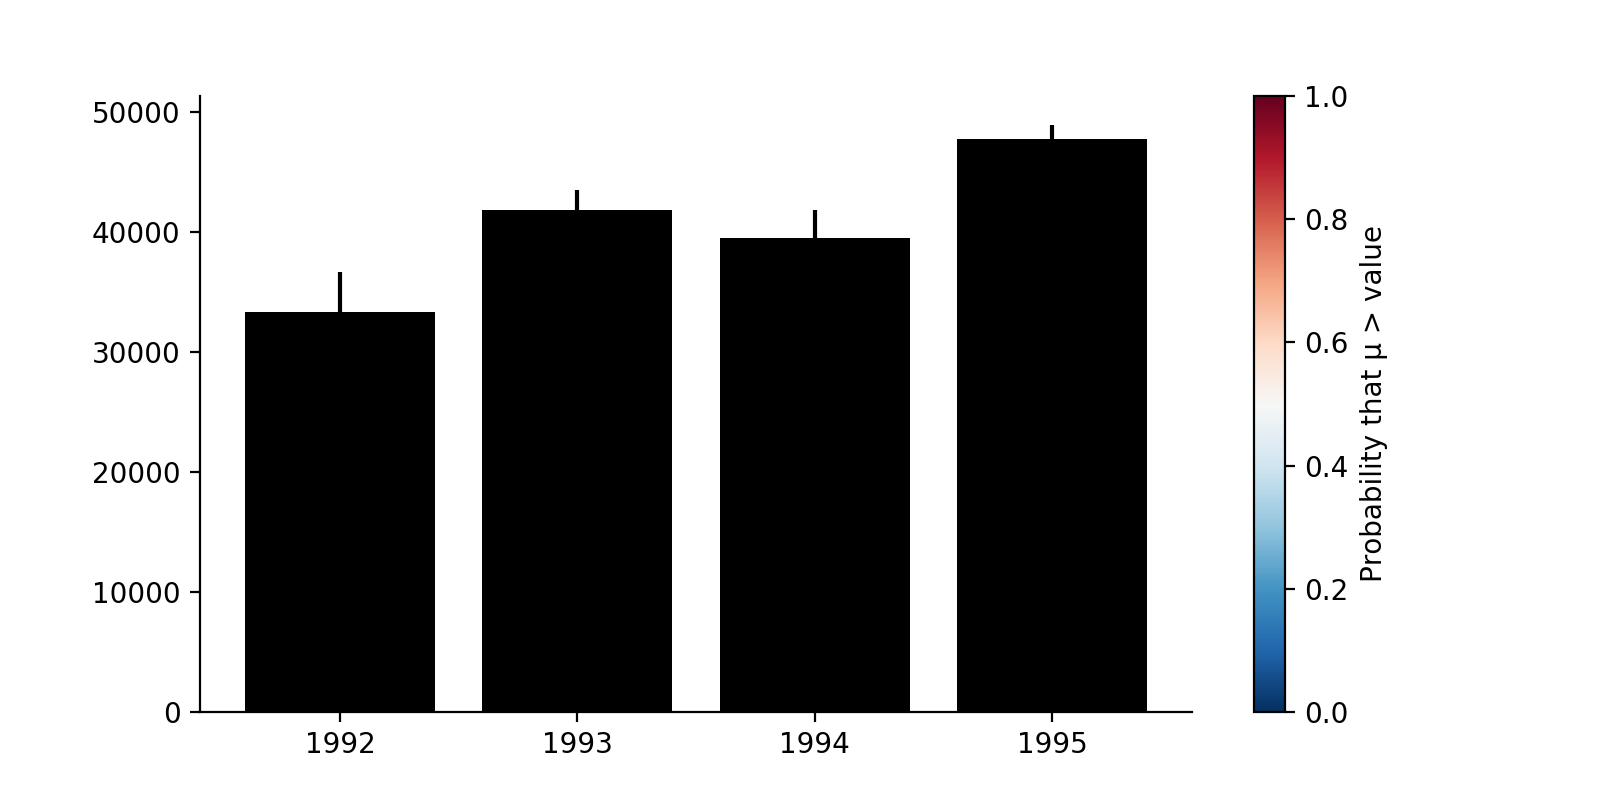

In [183]:
def create_probability_above_chart(df, rows=list(df.index)):
    plt.figure(figsize=(8,4))
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    cmap = cm.RdBu_r
    norm = colors.Normalize(vmin=0, vmax=1)

    # Event handler to redraw graph with color bars demonstrating probability
    def onclick(event):
        ax = plt.gca()
        if(event.ydata):
            ax.clear()
            plt.axhline(y=event.ydata, color='k', linewidth=.5, linestyle='--')
            for loc, key in enumerate(rows):
                mean = np.mean(df.loc[key])
                p_value = probability(df.loc[key], event.ydata)
                plt.bar(str(key), mean, color=cmap(norm(p_value)), yerr=st.sem(df.loc[key]))
            plt.title('value = %.3f' % event.ydata)
    
    for loc, key in enumerate(rows):
        mean = np.mean(df.loc[key])
        plt.bar(str(key), mean, color='black', yerr=st.sem(df.loc[key]))
    plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap)).set_label('Probability that μ > value')
    plt.gcf().canvas.mpl_connect('button_press_event', onclick)

create_probability_above_chart(df)

<IPython.core.display.Javascript object>


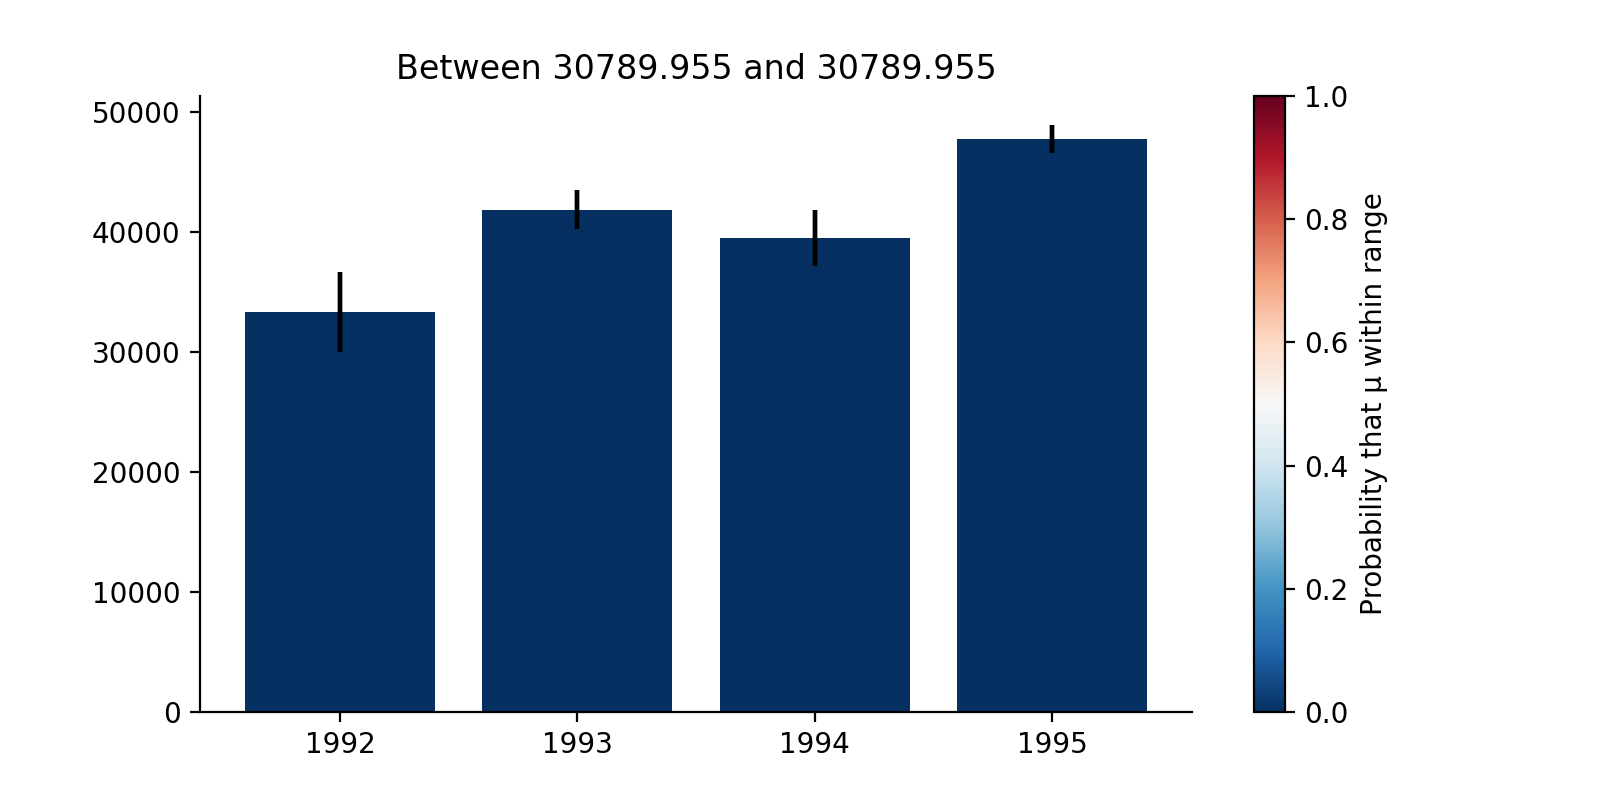

In [185]:
# Could not be refactored into a function, because SpanSelector does not work inside a function
plt.figure(figsize=(8,4))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
rows = df.index

cmap = cm.RdBu_r
norm = colors.Normalize(vmin=0, vmax=1)

def onselect_function(min_value, max_value):
    for loc, key in enumerate(rows):
        mean = np.mean(df.loc[key])
        p_value = probability(df.loc[key], min_value) - probability(df.loc[key], max_value)
        plt.bar(str(key), mean, color=cmap(norm(p_value)), yerr=st.sem(df.loc[key]))
        
    plt.title('Between %.3f and %.3f' % (min_value, max_value))

for loc, key in enumerate(rows):
    mean = np.mean(df.loc[key])
    plt.bar(str(key), mean, color='black', yerr=st.sem(df.loc[key]))

plt.title('Select a span of y-values')
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap)).set_label('Probability that μ within range')
tool = SpanSelector(ax, onselect=onselect_function, direction='vertical', useblit=True, span_stays=True, rectprops={'facecolor':'grey', 'alpha':.5})